In [2]:
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"        # Para imprimir todas las líneas
InteractiveShell.ast_node_interactivity = "last_expr"   # Para imprimir solo la última


In [19]:
import numpy as np                          # Librería para cálculo numérico
from sympy import *                         # Librería para cálculo simbólico
from sympy.plotting import plot as symplot  # Librería para la generación de graficos
from scipy.integrate import quad            # Librería scipy para comando de integración quad


# import pylab as plt # biblioteca para la generación de gráficos a partir de listas o arrays
# from sympy.abc import x, y, h # Carga de un simbólico "x"
# from sympy.plotting.pygletplot import PygletPlot as Plot # Librería para los gráficos



## Solución numérica de una ecuación con `fsolve()`

In [59]:
from sympy.abc import x                 # Carga el valor simbólico "x"            
from scipy.optimize import fsolve       # fsolve() resuelve ecuaciones no lineales

#f = x**2 - sin(x) - 1/2
f=input("Introduce lal función: ")

f_np = lambdify(x, f)                   # lambdify() convierte una expresión simbólica en una expresión que se puede evaluar numéricamente
solution = fsolve(f_np, 0.5)            # Hay que partir de un valor inicial de x, en este caso 0.5

# solution = fsolve(lambdify(x, x**2 - sin(x) - 1/2), 2)

print(solution)


Introduce lal función: x**2-sin(x)-1/2
[1.19608203]


**Sin utilizar el comando `lambdify`:**

In [46]:
from sympy.abc import x                 # Carga el valor simbólico "x"
from scipy.optimize import fsolve       # fsolve resuelve ecuaciones no lineales


def f_np(x):                            # Función para devolver el valor
  return [x[0]**2 - sin(x[0]) - 1/2]    # numérico de f_np

solution = fsolve(f_np, 0.5)

print(solution)

[1.19608203]


**Vamos a representar la función para ver los valores de los quodemos partir:**

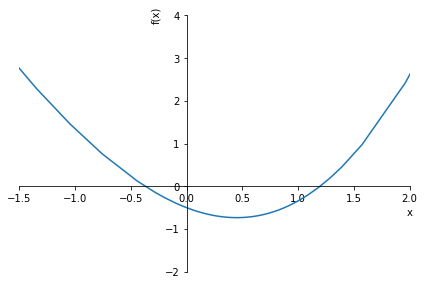

In [47]:
p = symplot(f, xlim=(-1.5,2), ylim=(-2,4)) 


**Comprobemos que se cumple el teorema de Bolzano en el intervalo [0,2]**

In [56]:
f=sympify(f)             # sympify convierte f, que es una cadena de caracteres al introducirla con input,
f.subs(x,0)*f.subs(x,2)  # en una expresión matemática que podemos evaluar

-7/4 + sin(2)/2

In [57]:
sign(f.subs(x,0)*f.subs(x,2)) # Proporciona el signo de f(0)*f(2)

-1

## Método de la Bisección

El **método de la Bisección** se implimetará de lal siguiente forma:

**Entrada:** Una función, un intervalo, el error en la función, la tolerancia
y el número de iteraciones: $f(x), a, b, epsilon, delta, n$ con $ f(a_i)·f(b_i) < 0 $, ∀i

**Salida:** $ c_i $

**Algoritmo**:
1. Calculamos el punto medio del intervalo como $ c_i = (a_i + b_i)/2 $, 
2. Comprobamos si cumple Bolzano, $ f(a_i)·f(c_i) < 0 $, entonces $ b_{i+1} = c_i $, $ a_{i+1} = a_i $, en caso contrario $ a_{i+1} = c_i $, $b_{i+1} = b_i $
3. Paramos si $ h_i < delta $ ó $ |f(c_i)| < epsilon $ ó $ i \geq n $
4. En caso de que no se cumpla ninguna de las condiciones de parada
$i = i + 1$ y volver al punto 1

Es un **método cerrado**, lo que significa que la raíz está en $[a_i, b_i]$

**Pseudocódigo**

```
BúsquedaPorBisección (f(x), a, b, Δ, ε, n)
  i:=0
  h:=abs(b-a)
  repetir
    i:=i+1
    c:=(a+b)/2
    h:=h/2
    si signo(f(a))*signo(f(c))<0 entonces
       b:=c
    si no
       a:=c
  hasta (abs(f(c)) ≤ ε) ó (h ≤ Δ) ó (i = n)
  devolver c
```

### Ejercicio 1
Construir una función llamada $biseccion(f,a,b,tolerancia,errorfun,maxiter)$ que implemente el Método de la Bisección, teniendo en cuenta que el error en la raíz es la $tolerancia = delta$, el error en la función es $errorfun = epsilon$ y el número máximo de iteraciones es $maxiter$

Prueba el método con la función $f(x) = x^2 − sin(x) − 0.5$ cuando $\Delta \leq 10^{-3}$, $\epsilon \leq 10^{-3}$ y 4 iteraciones como máximo, en el intervalo$[0, 2]$

Introduzca la función                : x**2-sin(x)-0.5
Introduzca a                         : 0
Introduzca b                         : 2
Introduzca la tolerancia             : .001
Introduzca el error de la función    : .001
Introduzca el máximo de iteraciones  : 4


 i         a            c            b          f(a)         f(c)         f(b)           h
01     0.000000     1.000000     2.000000    -0.500000    -0.341471     2.590703     1.000000   
02     1.000000     1.500000     2.000000    -0.341471     0.752505     2.590703     0.500000   
03     1.000000     1.250000     1.500000    -0.341471     0.113515     0.752505     0.250000   
04     1.000000     1.125000     1.250000    -0.341471    -0.136643     0.113515     0.125000   

 raiz:  1.125


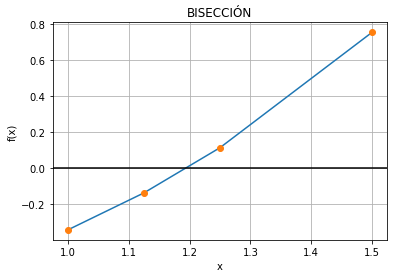

In [9]:
# IMPORTACIÓN DE LIBRERÍAS

import numpy as np
from sympy import *
from sympy.abc import x
import matplotlib.pyplot as plt

# FUNCIÓN BISECCIÓN

def biseccion(f,a,b,tolerancia,errorfun,maxiter):

    f = sympify(f)
    fa = f.subs(x,a)
    fb = f.subs(x,b)

    if fa * fb >= 0:
        tabla = []
        raiz = false
        solucion = false
        return (tabla,raiz,solucion)

    solucion=true
    tabla = []
    h = b - a

    i = 1
    while 1:
        h = h / 2
        c = (a + b) / 2
        fc = f.subs(x,c)
        tabla.append([i,a,c,b,fa,fc,fb,h])
        i = i + 1

        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

        if not(h >= tolerancia and abs(fc) >= errorfun and i <= maxiter):
            break

    tabla = np.array(tabla)
    raiz = c

    return(tabla,raiz,solucion)


# ENTRADA DE DATOS

f = input('Introduzca la función                : ')
a = float(input('Introduzca a                         : '))
b = float(input('Introduzca b                         : '))
tolerancia = float(input('Introduzca la tolerancia             : '))
errorfun = float(input('Introduzca el error de la función    : '))
maxiter = int(input('Introduzca el máximo de iteraciones  : '))


# LLAMADA A LA FUNCIÓN biseccion

(tabla,raiz,solucion) = biseccion(f,a,b,tolerancia,errorfun,maxiter)


# SALIDA DE RESULTADOS

if solucion == false:
    print('\n')
    print("El método de la bisección no se puede aplicar: f(a)*f(b)>=0")
    print('\n')

if solucion == true:
    print('\n')
    print(' i         a            c            b          f(a)         f(c)         f(b)           h')
    n = len(tabla)
    for i in range(0,n,1):
        unafila = tabla[i]
        formato = '{:0>2d}'+'   '+(len(unafila)-1)*'{:>10.6f}   '
        unafila = formato.format(*unafila)
        print(unafila)
    print('\n','raiz: ',raiz)


# REPRESENTACIÓN GRÁFICA

xi = tabla[:,2]
yi = tabla[:,5]

orden = np.argsort(xi)
xi = xi[orden]
yi = yi[orden]

plt.plot(xi,yi)
plt.plot(xi,yi,'o')
plt.axhline(0, color="black")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('BISECCIÓN')
plt.grid()
plt.show()

In [4]:
# OjO, esta es la solución que dan, si os fijáis es la misma que mía (con una sutil diferencia jejeje...)
# hasta la cuarta iteración, pero ellos dan el resultado del 'c' de la quinta iteración.
# Yo he puesto la condicón de parada al final por lo que cuatro iteraciones son cuatro... y el resultado
# es el 'c' de la cuarta iteración, no de la quita... pero en fin voy a hacer también de la otra forma...


h_n and f_c_n 1.0 0.341470984807897
h_n and f_c_n 1.5 0.752505013395946
h_n and f_c_n 1.25 0.113515380644414
h_n and f_c_n 1.125 0.136642594099095
Maximo de iteraciones alcanzadas
1.1875

Introduzca la función                : x**2-sin(x)-0.5
Introduzca a                         : 0
Introduzca b                         : 2
Introduzca la tolerancia             : .001
Introduzca el error de la función    : .001
Introduzca el máximo de iteraciones  : 4


 i         a            c            b          f(a)         f(c)         f(b)           h
01     0.000000     1.000000     2.000000    -0.500000    -0.341471     2.590703     1.000000   
02     1.000000     1.500000     2.000000    -0.341471     0.752505     2.590703     0.500000   
03     1.000000     1.250000     1.500000    -0.341471     0.113515     0.752505     0.250000   
04     1.000000     1.125000     1.250000    -0.341471    -0.136643     0.113515     0.125000   

 raiz:  1.1875


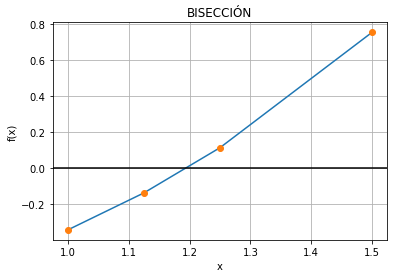

In [8]:
# IMPORTACIÓN DE LIBRERÍAS

import numpy as np
from sympy import *
from sympy.abc import x
import matplotlib.pyplot as plt

# FUNCIÓN BISECCIÓN

def biseccion(f,a,b,tolerancia,errorfun,maxiter):

    f = sympify(f)
    fa = f.subs(x,a)
    fb = f.subs(x,b)

    if fa * fb >= 0:
        tabla = []
        raiz = false
        solucion = false
        return (tabla,raiz,solucion)

    solucion=true
    tabla = []
    h = b - a

    i = 1
    while 1:
        h = h / 2
        c = (a + b) / 2
        fc = f.subs(x,c)
        tabla.append([i,a,c,b,fa,fc,fb,h])
        i = i + 1

        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

        if not(h >= tolerancia and abs(fc) >= errorfun and i <= maxiter):
            break

    tabla = np.array(tabla)
    c = (a + b) / 2              # OjO: aquí está la diferencia
    raiz = c

    return(tabla,raiz,solucion)


# ENTRADA DE DATOS

f = input('Introduzca la función                : ')
a = float(input('Introduzca a                         : '))
b = float(input('Introduzca b                         : '))
tolerancia = float(input('Introduzca la tolerancia             : '))
errorfun = float(input('Introduzca el error de la función    : '))
maxiter = int(input('Introduzca el máximo de iteraciones  : '))


# LLAMADA A LA FUNCIÓN biseccion

(tabla,raiz,solucion) = biseccion(f,a,b,tolerancia,errorfun,maxiter)


# SALIDA DE RESULTADOS

if solucion == false:
    print('\n')
    print("El método de la bisección no se puede aplicar: f(a)*f(b)>=0")
    print('\n')

if solucion == true:
    print('\n')
    print(' i         a            c            b          f(a)         f(c)         f(b)           h')
    n = len(tabla)
    for i in range(0,n,1):
        unafila = tabla[i]
        formato = '{:0>2d}'+'   '+(len(unafila)-1)*'{:>10.6f}   '
        unafila = formato.format(*unafila)
        print(unafila)
    print('\n','raiz: ',raiz)


# REPRESENTACIÓN GRÁFICA

xi = tabla[:,2]
yi = tabla[:,5]

orden = np.argsort(xi)
xi = xi[orden]
yi = yi[orden]

plt.plot(xi,yi)
plt.plot(xi,yi,'o')
plt.axhline(0, color="black")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('BISECCIÓN')
plt.grid()
plt.show()

In [ ]:
# Bueno, aceptamos pulpo como animal de compñía. Le pongo a su resultado el mismo formato que al mío
# par que se vea la coincidencia


                     c        |f(c)|
h_n and f_c_n    1.000000    0.341471
h_n and f_c_n    1.500000    0.752505
h_n and f_c_n    1.250000    0.113515
h_n and f_c_n    1.125000    0.136643

Maximo de iteraciones alcanzadas

raiz:  1.1875

Prueba el método con la función $f(x) = x^2 − sin(x) − 0.5$ cuando $\Delta \leq 10^{-3}$, $\epsilon \leq 10^{-3}$ y 4 iteraciones como máximo, en el intervalo $[−1, 0]$

In [ ]:
# MI RESULTADO


Introduzca la función                : x**2-sin(x)-0.5
Introduzca a                          : -1
Introduzca b                          : 0
Introduzca la tolerancia             : .001
Introduzca el error de la función    : .001
Introduzca el máximo de iteraciones  : 4


 i         a            c            b          f(a)         f(c)         f(b)           h
01    -1.000000    -0.500000     0.000000     1.341471     0.229426    -0.500000     0.500000   
02    -0.500000    -0.250000     0.000000     0.229426    -0.190096    -0.500000     0.250000   
03    -0.500000    -0.375000    -0.250000     0.229426     0.006898    -0.190096     0.125000   
04    -0.375000    -0.312500    -0.250000     0.006898    -0.094905    -0.190096     0.062500   

# raiz:  -0.34375

In [ ]:
# SU RESULTADO

h_n and f_c_n 0.5 0.229425538604203
h_n and f_c_n 0.25 0.190096040745477
h_n and f_c_n 0.375 0.00689752908604757
h_n and f_c_n 0.3125 0.0949052354196191
Maximo de iteraciones alcanzadas
-0.34375

Prueba el método con la función $f(x) = x^2 − sin(x) − 0.5$ cuando $\Delta \leq 10^{-5}$ en el intervalo$[0, 2]$ ¿cuántas iteraciones necesitas?

In [ ]:
# MI RESULTADO

#ntroduzca la función                : x**2-sin(x)-0.5
Introduzca a                          : 0
Introduzca b                          : 2
Introduzca la tolerancia             : .00001
Introduzca el error de la función    : .00000000000001
Introduzca el máximo de iteraciones  : 1000


 i         a            c            b          f(a)         f(c)         f(b)           h
01     0.000000     1.000000     2.000000    -0.500000    -0.341471     2.590703     1.000000   
02     1.000000     1.500000     2.000000    -0.341471     0.752505     2.590703     0.500000   
03     1.000000     1.250000     1.500000    -0.341471     0.113515     0.752505     0.250000   
04     1.000000     1.125000     1.250000    -0.341471    -0.136643     0.113515     0.125000   
05     1.125000     1.187500     1.250000    -0.136643    -0.017281     0.113515     0.062500   
06     1.187500     1.218750     1.250000    -0.017281     0.046682     0.113515     0.031250   
07     1.187500     1.203125     1.218750    -0.017281     0.014343     0.046682     0.015625   
08     1.187500     1.195312     1.203125    -0.017281    -0.001558     0.014343     0.007812   
09     1.195312     1.199219     1.203125    -0.001558     0.006370     0.014343     0.003906   
10     1.195312     1.197266     1.199219    -0.001558     0.002400     0.006370     0.001953   
11     1.195312     1.196289     1.197266    -0.001558     0.000420     0.002400     0.000977   
12     1.195312     1.195801     1.196289    -0.001558    -0.000570     0.000420     0.000488   
13     1.195801     1.196045     1.196289    -0.000570    -0.000075     0.000420     0.000244   
14     1.196045     1.196167     1.196289    -0.000075     0.000172     0.000420     0.000122   
15     1.196045     1.196106     1.196167    -0.000075     0.000048     0.000172     0.000061   
16     1.196045     1.196075     1.196106    -0.000075    -0.000013     0.000048     0.000031   
17     1.196075     1.196091     1.196106    -0.000013     0.000018     0.000048     0.000015   
18     1.196075     1.196083     1.196091    -0.000013     0.000002     0.000018     0.000008   

 raiz:  1.1960792541503906

# Como se puede comporbar el la iteración 18 ya tenemos un error menor a 0.00001. Si os fijáis en sus
# resltados (abajo) a partir de la linea 18 el resultado es 1.19608 (ya no varí el quinto decimal)

In [ ]:
h_n and f_c_n 1.0 0.341470984807897
h_n and f_c_n 1.5 0.752505013395946
h_n and f_c_n 1.25 0.113515380644414
h_n and f_c_n 1.125 0.136642594099095
h_n and f_c_n 1.1875 0.0172806673848677
h_n and f_c_n 1.21875 0.0466824969232402
h_n and f_c_n 1.203125 0.0143428644864758
h_n and f_c_n 1.1953125 0.00155832788866883
h_n and f_c_n 1.19921875 0.00636990078696520
h_n and f_c_n 1.197265625 0.00240019592545715
h_n and f_c_n 1.1962890625 0.000419536557499267
h_n and f_c_n 1.19580078125 0.000569745009508682
h_n and f_c_n 1.196044921875 7.51915646501899e-5
h_n and f_c_n 1.1961669921875 0.000172150661430281
h_n and f_c_n 1.19610595703125 4.84740896831148e-5
h_n and f_c_n 1.196075439453125 1.33601021551355e-5
h_n and f_c_n 1.1960906982421875 1.75566525953963e-5
h_n and f_c_n 1.1960830688476562 2.09818992813471e-6
h_n and f_c_n 1.1960792541503906 5.63097743655483e-6
h_n and f_c_n 1.1960811614990234 1.76639908500142e-6
h_n and f_c_n 1.1960821151733398 1.65894088910434e-7
h_n and f_c_n 1.1960816383361816 8.00252831223425e-7
h_n and f_c_n 1.1960818767547607 3.17179454478733e-7
h_n and f_c_n 1.1960819959640503 7.56427036563423e-8
h_n and f_c_n 1.196082055568695 4.51256874089978e-8
h_n and f_c_n 1.1960820257663727 1.52585093449176e-8
h_n and f_c_n 1.1960820406675339 1.49335886989732e-8
h_n and f_c_n 1.1960820332169533 1.62460489505634e-10
h_n and f_c_n 1.1960820369422436 7.38556416024494e-9
h_n and f_c_n 1.1960820350795984 3.61155183536965e-9
h_n and f_c_n 1.1960820341482759 1.72454583946546e-9
h_n and f_c_n 1.1960820336826146 7.81042674979915e-10
h_n and f_c_n 1.196082033449784 3.09291037225989e-10
h_n and f_c_n 1.1960820333333686 7.34152738601779e-11
h_n and f_c_n 1.196082033275161 4.45224968004254e-11
h_n and f_c_n 1.1960820333042648 1.44463330187250e-11
h_n and f_c_n 1.1960820332897129 1.50379708685477e-11
h_n and f_c_n 1.1960820332969888 2.95874436062604e-13
h_n and f_c_n 1.1960820333006268 7.07522929133120e-12
h_n and f_c_n 1.1960820332988078 3.38984396108799e-12
h_n and f_c_n 1.1960820332978983 1.54687374021023e-12
h_n and f_c_n 1.1960820332974436 6.25499652073813e-13
h_n and f_c_n 1.1960820332972162 1.64979141459298e-13
h_n and f_c_n 1.1960820332971025 6.53921361504217e-14
h_n and f_c_n 1.1960820332971593 4.96269692007445e-14
h_n and f_c_n 1.196082033297131 7.88258347483861e-15
h_n and f_c_n 1.1960820332971451 2.08721928629529e-14
h_n and f_c_n 1.196082033297138 6.55031584528842e-15
h_n and f_c_n 1.1960820332971345 7.77156117237610e-16
h_n and f_c_n 1.1960820332971362 2.77555756156289e-15
h_n and f_c_n 1.1960820332971354 1.11022302462516e-15
h_n and f_c_n 1.196082033297135 2.22044604925031e-16
h_n and f_c_n 1.1960820332971347 2.22044604925031e-16
h_n and f_c_n 1.196082033297135 2.22044604925031e-16
h_n and f_c_n 1.196082033297135 2.22044604925031e-16
h_n and f_c_n 1.196082033297135 2.22044604925031e-16
h_n and f_c_n 1.196082033297135 2.22044604925031e-16
h_n and f_c_n 1.196082033297135 2.22044604925031e-16
h_n and f_c_n 1.196082033297135 2.22044604925031e-16
No cambio en el punto. 
1.196082033297135

### Ejercicio 2
Dada la definición anterior que permite almacenar la información por iteración, construye una nueva función llamada $Xbiseccion(f,a,b,tolerancia,errorfun,maxiter)$ que implemente el Método de la Bisección y que almacene los resultados intermedios. 

**La función que he hecho en el Ejercicio 1 ya hace lo que se pide aquí. El ejercicio anterior**
**se podría haber hecho más sencillo, sin almacenar datos y con salida sin formato...**

Prueba el método con la función $f(x) = x^2 − sin(x) − 0.5$ cuando $\Delta \leq 10^{-9}$, $\epsilon \leq 10^{-9}$ y 10 iteraciones como máximo en el intervalo $[0, 2]$

Introduzca la función                : x**2-sin(x)-0.5
Introduzca a                         : 0
Introduzca b                         : 2
Introduzca la tolerancia             : 1e-9
Introduzca el error de la función    : 1e-9
Introduzca el máximo de iteraciones  : 10


 i         a            c            b          f(a)         f(c)         f(b)           h
01     0.000000     1.000000     2.000000    -0.500000    -0.341471     2.590703     1.000000   
02     1.000000     1.500000     2.000000    -0.341471     0.752505     2.590703     0.500000   
03     1.000000     1.250000     1.500000    -0.341471     0.113515     0.752505     0.250000   
04     1.000000     1.125000     1.250000    -0.341471    -0.136643     0.113515     0.125000   
05     1.125000     1.187500     1.250000    -0.136643    -0.017281     0.113515     0.062500   
06     1.187500     1.218750     1.250000    -0.017281     0.046682     0.113515     0.031250   
07     1.187500     1.203125     1.218750    -0.017281    

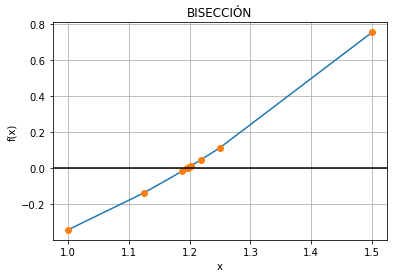

In [7]:
# IMPORTACIÓN DE LIBRERÍAS

import numpy as np
from sympy import *
from sympy.abc import x
import matplotlib.pyplot as plt

# FUNCIÓN BISECCIÓN

def biseccion(f,a,b,tolerancia,errorfun,maxiter):

    f = sympify(f)
    fa = f.subs(x,a)
    fb = f.subs(x,b)

    if fa * fb >= 0:
        tabla = []
        raiz = false
        solucion = false
        return (tabla,raiz,solucion)

    solucion=true
    tabla = []
    h = b - a

    i = 1
    while 1:
        h = h / 2
        c = (a + b) / 2
        fc = f.subs(x,c)
        tabla.append([i,a,c,b,fa,fc,fb,h])
        i = i + 1

        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

        if not(h >= tolerancia and abs(fc) >= errorfun and i <= maxiter):
            break

    tabla = np.array(tabla)
    c = (a + b) / 2              # OjO: aquí está la diferencia
    raiz = c

    return(tabla,raiz,solucion)


# ENTRADA DE DATOS

f = input('Introduzca la función                : ')
a = float(input('Introduzca a                         : '))
b = float(input('Introduzca b                         : '))
tolerancia = float(input('Introduzca la tolerancia             : '))
errorfun = float(input('Introduzca el error de la función    : '))
maxiter = int(input('Introduzca el máximo de iteraciones  : '))


# LLAMADA A LA FUNCIÓN biseccion

(tabla,raiz,solucion) = biseccion(f,a,b,tolerancia,errorfun,maxiter)


# SALIDA DE RESULTADOS

if solucion == false:
    print('\n')
    print("El método de la bisección no se puede aplicar: f(a)*f(b)>=0")
    print('\n')

if solucion == true:
    print('\n')
    print(' i         a            c            b          f(a)         f(c)         f(b)           h')
    n = len(tabla)
    for i in range(0,n,1):
        unafila = tabla[i]
        formato = '{:0>2d}'+'   '+(len(unafila)-1)*'{:>10.6f}   '
        unafila = formato.format(*unafila)
        print(unafila)
    print('\n','raiz: ',raiz)

    
# REPRESENTACIÓN GRÁFICA

xi = tabla[:,2]
yi = tabla[:,5]

orden = np.argsort(xi)
xi = xi[orden]
yi = yi[orden]

plt.plot(xi,yi)
plt.plot(xi,yi,'o')
plt.axhline(0, color="black")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('BISECCIÓN')
plt.grid()
plt.show()

In [ ]:
# MI RESULTADO

Introduzca la función                : x**2-sin(x)-0.5
Introduzca a                         : 0
Introduzca b                         : 2
Introduzca la tolerancia             : 1e-9
Introduzca el error de la función    : 1e-9
Introduzca el máximo de iteraciones  : 10


 i         a            c            b          f(a)         f(c)         f(b)           h
01     0.000000     1.000000     2.000000    -0.500000    -0.341471     2.590703     1.000000   
02     1.000000     1.500000     2.000000    -0.341471     0.752505     2.590703     0.500000   
03     1.000000     1.250000     1.500000    -0.341471     0.113515     0.752505     0.250000   
04     1.000000     1.125000     1.250000    -0.341471    -0.136643     0.113515     0.125000   
05     1.125000     1.187500     1.250000    -0.136643    -0.017281     0.113515     0.062500   
06     1.187500     1.218750     1.250000    -0.017281     0.046682     0.113515     0.031250   
07     1.187500     1.203125     1.218750    -0.017281     0.014343     0.046682     0.015625   
08     1.187500     1.195312     1.203125    -0.017281    -0.001558     0.014343     0.007812   
09     1.195312     1.199219     1.203125    -0.001558     0.006370     0.014343     0.003906   
10     1.195312     1.197266     1.199219    -0.001558     0.002400     0.006370     0.001953   

 raiz:  1.1962890625

In [ ]:
# SU RESULTADO (un poco arreglado para poder ver algo)

h_n and f_c_n 1.0 0.341470984807897
h_n and f_c_n 1.5 0.752505013395946
h_n and f_c_n 1.25 0.113515380644414
h_n and f_c_n 1.125 0.136642594099095
h_n and f_c_n 1.1875 0.0172806673848677
h_n and f_c_n 1.21875 0.0466824969232402
h_n and f_c_n 1.203125 0.0143428644864758
h_n and f_c_n 1.1953125 0.00155832788866883
h_n and f_c_n 1.19921875 0.00636990078696520
h_n and f_c_n 1.197265625 0.00240019592545715
Maximo de iteraciones alcanzadas
1.1962890625 

[Iteracion(a=1.0, b=2, h=1.0, c=1.0, f_c=-0.341470984807897), 
 Iteracion(a=1.0, b=1.5, h=1.5, c=1.5, f_c=0.752505013395946), 
 Iteracion(a=1.0, b=1.25, h=1.25, c=1.25, f_c=0.113515380644414), 
 Iteracion(a=1.125, b=1.25, h=1.125, c=1.125, f_c=-0.136642594099095), 
 Iteracion(a=1.1875, b=1.25, h=1.1875, c=1.1875, f_c=-0.0172806673848677), 
 Iteracion(a=1.1875, b=1.21875, h=1.21875, c=1.21875, f_c=0.0466824969232402), 
 Iteracion(a=1.1875, b=1.203125, h=1.203125, c=1.203125, f_c=0.0143428644864758), 
 Iteracion(a=1.1953125, b=1.203125, h=1.1953125, c=1.1953125, f_c=-0.00155832788866883), 
 Iteracion(a=1.1953125, b=1.19921875, h=1.19921875, c=1.19921875, f_c=0.00636990078696520), 
 Iteracion(a=1.1953125, b=1.197265625, h=1.197265625, c=1.197265625, f_c=0.00240019592545715)]

**Aquí tenéis el código para representar el método de bisección. Necesita la salida que han hecho ellos.**

In [ ]:
# Representación gráfica del Método de la Bisección, siendo l la tabla de resultados intermedios
# obtenidos en el ejercicio anterior

import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))

def plot_fun_and_invervals(f,l):
  p = symplot(f, xlim=(-6,6), ylim=(-2,12), show=False)
  mycolors = get_colors(len(l)) # sample return:  ['#8af5da', '#fbc08c', '#b741d0', '#e599f1', '#bbcb59', '#a2a6c0']
  for i in range(len(l)):
    a = l[i].a
    b = l[i].b
    print("a and b", a, b)
    #q = plot_implicit(And(x > a, x < b), show=False)
    q1 = plot_implicit(x - a, x_var=x, line_color=mycolors[i], show=False)
    q2 = plot_implicit(x - b, x_var=x, line_color=mycolors[i], show=False)
    p.extend(q1)
    p.extend(q2)
    p.show()
plot_fun_and_invervals(f,l)

## Método de la Secante

El **método de la Secante** se define como sigue:

Entrada: Una función, un intervalo, el error en la función, la tolerancia
y el número de iteraciones: $f(x), a, b, epsilon, delta, n$

Salida: $ c_i $

**Algoritmo**:
1. Si $|f(a_i)| > |f(b_i)|$ entonces intercambiar $a_i$ y $b_i$
2. Hacer $c_i = a_i − h_i$ donde $h_i = \frac{f(a_i)(b_i−a_i)}{f(b_i)−f(a_i)}$
3. El nuevo valor de $c_i$ sustituye a $b_i$, es decir, $b_i = c_i$
4. Paramos si $h_i < \Delta$ o $|f(c_i)| < \epsilon$ o $i \geq n$
5. En caso de que no se cumpla ninguna de las condiciones de parada
$i = i + 1$ y volver al punto 1

Es un **método abierto**, lo que significa que no se tiene seguridad de que
la raíz está en $[a_i, b_i]$

**Pseudocódigo**

```
BúsquedaPorSecante (f(x), a, b, Δ, ε, n)
  i:=0
  repetir
     i:=i+1
     si abs(f(a)) > abs(f(b)) entonces
        (*/ Intercambiar ‘a’ por ‘b’ /*)
        a <=> b
     h:=f(a)*(b-a)/(f(b)-f(a))
     c:=a-h
     b:=c
  hasta (abs(f(c))≤ε) ó (abs(h)≤Δ) ó (i=n)
devolver c
```

### Ejercicio 3
Construir una función llamada $secante(f,a,b,tolerancia,errorfun,maxiter)$ que implemente el Método de la Secante, teniendo en cuenta que el error en la raíz es la $tolerancia = delta$, el error en la función es $errorfun = epsilon$ y el número máximo de iteraciones es $maxiter$

Prueba el método con la función $f(x) = x^2 − sin(x) − 0.5$ cuando $\Delta \leq 10^{-3}$, $\epsilon \leq 10^{-3}$ y 4 iteraciones como máximo, en el intervalo$[0, 2]$

In [6]:
# MÉTODO DE LA SECANTE. 

# IMPORTACIÓN DE LIBRERÍAS

import numpy as np
from sympy import *
from sympy.abc import x

# FUNCIÓN SECANTE

def secante(f,a,b,tolerancia,errorfun,maxiter):

    f = sympify(f)
    tabla = []

    i = 1
    while 1:
        
        fa = f.subs(x,a)
        fb = f.subs(x,b)
        if abs(fa) > abs(fb):
            auxiliar1 = a
            a = b
            b = auxiliar1
            
            auxiliar2 = fa
            fa = fb
            fb = auxiliar2
        
        h = fa * (b - a) / (fb - fa)
        c = a - h 
        fc = f.subs(x,c)
        tabla.append([i,a,c,b,fa,fc,fb,h])
        b = c
        i = i + 1

        if not(abs(h) >= tolerancia and abs(fc) >= errorfun and i <= maxiter):
            break

    tabla = np.array(tabla)
    c = a - h
    raiz = c

    return(tabla,raiz)


# ENTRADA DE DATOS

f = input('Introduzca la función                : ')
a = float(input('Introduzca a                         : '))
b = float(input('Introduzca b                         : '))
tolerancia = float(input('Introduzca la tolerancia             : '))
errorfun = float(input('Introduzca el error de la función    : '))
maxiter = int(input('Introduzca el máximo de iteraciones  : '))


# LLAMADA A LA FUNCIÓN biseccion

(tabla,raiz) = secante(f,a,b,tolerancia,errorfun,maxiter)


# SALIDA DE RESULTADOS

print('\n')
print(' i         a            c            b          f(a)         f(c)         f(b)           h')
n = len(tabla)
for i in range(0,n,1):
    unafila = tabla[i]
    formato = '{:0>2d}'+'   '+(len(unafila)-1)*'{:>10.6f}   '
    unafila = formato.format(*unafila)
    print(unafila)
print('\n','raiz: ',raiz)

Introduzca la función                : x**2-sin(x)-0.5
Introduzca a                         : 0
Introduzca b                         : 2
Introduzca la tolerancia             : .001
Introduzca el error de la función    : .001
Introduzca el máximo de iteraciones  : 4


 i         a            c            b          f(a)         f(c)         f(b)           h
01     0.000000     0.323551     2.000000    -0.500000    -0.713250     2.590703    -0.323551   
02     0.000000    -0.758619     0.323551    -0.500000     0.763422    -0.713250     0.758619   
03     0.000000    -0.300224    -0.758619    -0.500000    -0.114132     0.763422     0.300224   
04    -0.300224    -0.389024     0.000000    -0.114132     0.030625    -0.500000     0.088800   

 raiz:  -0.389023629917976


In [ ]:
# MI RESULTADO

Introduzca la función                : x**2-sin(x)-0.5
Introduzca a                         : 0
Introduzca b                         : 2
Introduzca la tolerancia             : .001
Introduzca el error de la función    : .001
Introduzca el máximo de iteraciones  : 4


i         a            c            b          f(a)         f(c)         f(b)           h
01     0.000000     0.323551     2.000000    -0.500000    -0.713250     2.590703    -0.323551   
02     0.000000    -0.758619     0.323551    -0.500000     0.763422    -0.713250     0.758619   
03     0.000000    -0.300224    -0.758619    -0.500000    -0.114132     0.763422     0.300224   
04    -0.300224    -0.389024     0.000000    -0.114132     0.030625    -0.500000     0.088800   

 raiz:  -0.389023629917976

In [ ]:
# SU RESULTADO

h_n and f_c_n 0.32355102968479627 0.7132500645589028
h_n and f_c_n 0.758618831731764 0.7634221996871497
h_n and f_c_n 0.3002238016395526 0.11413166379783507
h_n and f_c_n 0.08879982827842378 0.030624565150047134
Maximo de iteraciones alcanzadas
-0.38902362991797634

Prueba el método con la función $f(x) = x^2 − sin(x) − 0.5$ cuando $\Delta \leq 10^{-3}$, $\epsilon \leq 10^{-3}$ y 4 iteraciones como máximo, en el intervalo$[-1, 0]$

In [ ]:
# MI RESULTADO

Introduzca la función                : x**2-sin(x)-0.5
Introduzca a                         : -1
Introduzca b                         : 0
Introduzca la tolerancia             : .001
Introduzca el error de la función    : .001
Introduzca el máximo de iteraciones  : 4


 i         a            c            b          f(a)         f(c)         f(b)           h
01     0.000000    -0.271522    -1.000000    -0.500000    -0.158078     1.341471     0.271522   
02    -0.271522    -0.397052     0.000000    -0.158078     0.044352    -0.500000     0.125530   
03    -0.397052    -0.369549    -0.271522     0.044352    -0.002239    -0.158078    -0.027504   
04    -0.369549    -0.370870    -0.397052    -0.002239    -0.000028     0.044352     0.001322   

 raiz:  -0.370870491229320

In [ ]:
# SU RESULTADO

h_n and f_c_n 0.27152206259288975 0.15807772273829734
h_n and f_c_n 0.1255302511191391 0.04435219540359808
h_n and f_c_n 0.027503554206825133 0.002239023037371335
h_n and f_c_n 0.0013217317241165393 2.820110359064154e-05
Tolerancia o error aceptable. 
-0.37087049122932025

Prueba el método con la función $f(x) = x^2 − sin(x) − 0.5$ cuando $\Delta \leq 10^{-5}$ en el intervalo$[0, 2]$ ¿cuántas iteraciones necesitas?

In [ ]:
# MI RESULTADO

Introduzca la función                : x**2-sin(x)-0.5
Introduzca a                         : 0
Introduzca b                         : 2
Introduzca la tolerancia             : .00001
Introduzca el error de la función    : .00000000000001
Introduzca el máximo de iteraciones  : 1000


 i         a            c            b          f(a)         f(c)         f(b)           h
01     0.000000     0.323551     2.000000    -0.500000    -0.713250     2.590703    -0.323551   
02     0.000000    -0.758619     0.323551    -0.500000     0.763422    -0.713250     0.758619   
03     0.000000    -0.300224    -0.758619    -0.500000    -0.114132     0.763422     0.300224   
04    -0.300224    -0.389024     0.000000    -0.114132     0.030625    -0.500000     0.088800   
05    -0.389024    -0.370237    -0.300224     0.030625    -0.001088    -0.114132    -0.018786   
06    -0.370237    -0.370882    -0.389024    -0.001088    -0.000010     0.030625     0.000644   
07    -0.370882    -0.370887    -0.370237    -0.000010     0.000000    -0.001088     0.000006   

 raiz:  -0.370887341925819
        
# Como se puede comporbar el la iteración 7 ya tenemos un error menor a 0.00001

In [ ]:
h_n and f_c_n 0.32355102968479627 0.7132500645589028
h_n and f_c_n 0.758618831731764 0.7634221996871497
h_n and f_c_n 0.3002238016395526 0.11413166379783507
h_n and f_c_n 0.08879982827842378 0.030624565150047134
h_n and f_c_n 0.01878645324067329 0.0010878849120770084
h_n and f_c_n 0.0006444629472630462 9.541339700269713e-06
h_n and f_c_n 5.702301253134901e-06 3.0359490477138706e-09
Tolerancia o error aceptable. 
-0.37088734192581924

## Ejercicio 4
Modifica la función anterior para que almacene la tabla como en el ejercicio 2. Prueba la función con $f(x)=x^2−sin(x)−0.5$ cuando $\Delta \leq 10^{−9}$, $\epsilon \leq 10^{−9}$ y 10 iteraciones como máximo en el intervalo $[0,1]$

**La función que he hecho en el Ejercicio 3 ya hace lo que se pide aquí. El ejercicio anterior**
**se podría haber hecho más sencillo, sin almacenar datos y con salida sin formato...**

In [5]:
# MÉTODO DE LA SECANTE. 

# IMPORTACIÓN DE LIBRERÍAS

import numpy as np
from sympy import *
from sympy.abc import x

# FUNCIÓN SECANTE

def secante(f,a,b,tolerancia,errorfun,maxiter):

    f = sympify(f)
    tabla = []

    i = 1
    while 1:
        
        fa = f.subs(x,a)
        fb = f.subs(x,b)
        if abs(fa) > abs(fb):
            auxiliar1 = a
            a = b
            b = auxiliar1
            
            auxiliar2 = fa
            fa = fb
            fb = auxiliar2
        
        h = fa * (b - a) / (fb - fa)
        c = a - h 
        fc = f.subs(x,c)
        tabla.append([i,a,c,b,fa,fc,fb,h])
        b = c
        i = i + 1

        if not(abs(h) >= tolerancia and abs(fc) >= errorfun and i <= maxiter):
            break

    tabla = np.array(tabla)
    c = a - h
    raiz = c

    return(tabla,raiz)


# ENTRADA DE DATOS

f = input('Introduzca la función                : ')
a = float(input('Introduzca a                         : '))
b = float(input('Introduzca b                         : '))
tolerancia = float(input('Introduzca la tolerancia             : '))
errorfun = float(input('Introduzca el error de la función    : '))
maxiter = int(input('Introduzca el máximo de iteraciones  : '))


# LLAMADA A LA FUNCIÓN biseccion

(tabla,raiz) = secante(f,a,b,tolerancia,errorfun,maxiter)


# SALIDA DE RESULTADOS

print('\n')
print(' i         a            c            b          f(a)         f(c)         f(b)           h')
n = len(tabla)
for i in range(0,n,1):
    unafila = tabla[i]
    formato = '{:0>2d}'+'   '+(len(unafila)-1)*'{:>10.6f}   '
    unafila = formato.format(*unafila)
    print(unafila)
print('\n','raiz: ',raiz)

Introduzca la función                : x**2-sin(x)-0.5
Introduzca a                         : 0
Introduzca b                         : 1
Introduzca la tolerancia             : 1e-9
Introduzca el error de la función    : 1e-9
Introduzca el máximo de iteraciones  : 10


 i         a            c            b          f(a)         f(c)         f(b)           h
01     1.000000     3.153997     0.000000    -0.341471     9.460099    -0.500000    -2.153997   
02     1.000000     1.075042     3.153997    -0.341471    -0.223895     9.460099    -0.075042   
03     1.075042     1.217941     1.000000    -0.223895     0.044991    -0.341471    -0.142899   
04     1.217941     1.194031     1.075042     0.044991    -0.004150    -0.223895     0.023910   
05     1.194031     1.196050     1.217941    -0.004150    -0.000065     0.044991    -0.002019   
06     1.196050     1.196082     1.194031    -0.000065     0.000000    -0.004150    -0.000032   
07     1.196082     1.196082     1.196050     0.000000    

In [ ]:
# MI RESULTADO

Introduzca la función                : x**2-sin(x)-0.5
Introduzca a                         : 0
Introduzca b                         : 1
Introduzca la tolerancia             : 1e-9
Introduzca el error de la función    : 1e-9
Introduzca el máximo de iteraciones  : 10


 i         a            c            b          f(a)         f(c)         f(b)           h
01     1.000000     3.153997     0.000000    -0.341471     9.460099    -0.500000    -2.153997   
02     1.000000     1.075042     3.153997    -0.341471    -0.223895     9.460099    -0.075042   
03     1.075042     1.217941     1.000000    -0.223895     0.044991    -0.341471    -0.142899   
04     1.217941     1.194031     1.075042     0.044991    -0.004150    -0.223895     0.023910   
05     1.194031     1.196050     1.217941    -0.004150    -0.000065     0.044991    -0.002019   
06     1.196050     1.196082     1.194031    -0.000065     0.000000    -0.004150    -0.000032   
07     1.196082     1.196082     1.196050     0.000000    -0.000000    -0.000065     0.000000   

 raiz:  1.19608203329604

In [ ]:
# SU RESULTADO (un poco arreglado para poder ver algo)

fa, fb -0.5 -0.3414709848078965
a,   b 0.0 1.0
interchange done
fa, fb -0.3414709848078965 -0.5
a,   b 1.0 0.0
h_n and f_c_n 2.15399675822187 9.460099337422253
1
fa, fb -0.3414709848078965 9.460099337422253
a,   b 1.0 3.15399675822187
fa, fb -0.3414709848078965 9.460099337422253
a,   b 1.0 3.15399675822187
h_n and f_c_n 0.0750417912765313 0.2238951781323555
2
fa, fb -0.3414709848078965 -0.2238951781323555
a,   b 1.0 1.0750417912765313
interchange done
fa, fb -0.2238951781323555 -0.3414709848078965
a,   b 1.0750417912765313 1.0
h_n and f_c_n 0.14289925538503825 0.044990577436720414
3
fa, fb -0.2238951781323555 0.044990577436720414
a,   b 1.0750417912765313 1.2179410466615697
interchange done
fa, fb 0.044990577436720414 -0.2238951781323555
a,   b 1.2179410466615697 1.0750417912765313
h_n and f_c_n 0.02391022909132363 0.004149921205577223
4
fa, fb 0.044990577436720414 -0.004149921205577223
a,   b 1.2179410466615697 1.194030817570246
interchange done
fa, fb -0.004149921205577223 0.044990577436720414
a,   b 1.194030817570246 1.2179410466615697
h_n and f_c_n 0.0020192218125130042 6.482320661149732e-05
5
fa, fb -0.004149921205577223 -6.482320661149732e-05
a,   b 1.194030817570246 1.1960500393827591
interchange done
fa, fb -6.482320661149732e-05 -0.004149921205577223
a,   b 1.1960500393827591 1.194030817570246
h_n and f_c_n 3.204144252600868e-05 9.629951713829854e-08
6
fa, fb -6.482320661149732e-05 9.629951713829854e-08
a,   b 1.1960500393827591 1.1960820808252852
interchange done
fa, fb 9.629951713829854e-08 -6.482320661149732e-05
a,   b 1.1960820808252852 1.1960500393827591
h_n and f_c_n 4.752925010804822e-08 2.2281065881202267e-12
Tolerancia o error aceptable. 
1.1960820332960351 

[Iteracion(a=1.0, b=3.15399675822187, h=-2.15399675822187, c=3.15399675822187, f_c=9.46009933742225), 
 Iteracion(a=1.0, b=1.0750417912765313, h=-0.0750417912765313, c=1.0750417912765313, f_c=-0.223895178132355), 
 Iteracion(a=1.0750417912765313, b=1.2179410466615697, h=-0.14289925538503825, c=1.2179410466615697, f_c=0.0449905774367204), 
 Iteracion(a=1.2179410466615697, b=1.194030817570246, h=0.02391022909132363, c=1.194030817570246, f_c=-0.00414992120557722), 
 Iteracion(a=1.194030817570246, b=1.1960500393827591, h=-0.0020192218125130042, c=1.1960500393827591, f_c=-6.48232066114973e-5), 
 Iteracion(a=1.1960500393827591, b=1.1960820808252852, h=-3.204144252600868e-05, c=1.1960820808252852, f_c=9.62995171382985e-8)]

**Aquí tenéis el código para representar el método de la secante. Necesita la salida que han hecho ellos.**

In [ ]:
# Representación gráfica del método de la secante, siendo l la tabla de resultados
# intermedios obtenidos en el ejercicio anterior

import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
def plot_fun_and_secants(f,l):
  p = symplot(f, xlim=(-6,6), ylim=(-2,12), show=False)
  mycolors = get_colors(len(l)) # sample return:  ['#8af5da', '#fbc08c', '#b741d0', '#e599f1', '#bbcb59', '#a2a6c0']
  for i in range(len(l)):
    a = l[i].a
    b = l[i].b
    m = (f.subs(x,b)-f.subs(x,a))/(b-a)
    print("a, b and m", a, b, m)
    q = plot(m*(x-a)+f.subs(x,a), line_color=mycolors[i], show=False)
    p.extend(q)
    p.show()
plot_fun_and_secants(f,l)

## Método de Regula Falsi

El **método de Regula Falsi** se define como sigue:

Entrada: Una función, un intervalo, el error en la función, la tolerancia
y el número de iteraciones: $f(x), a, b, epsilon, delta, n$ con $f(a_i)·f(b_i) < 0$

Salida: $ c_i $

**Algoritmo**:
1. Si $|f(a_i)| > |f(b_i)|$ entonces intercambiar $a_i$ y $b_i$
2. Sea $c_i = a_i − h_i$ donde $h_i = \frac{f(a_i)(b_i−a_i)}{f(b_i)−f(a_i)}$
3. Comprobamos si cumple Bolzano, $f(a_i)·f(b_i) < 0$, entonces $b_{i+1}=c_i$ y $a_{i+1}=a_i$, en caso contrario, $a_{i+1}=c_i$, $b_{i+1}=b_i$
4. Paramos si $h_i < \Delta$ o $|f(c_i)| < \epsilon$ o $i \geq n$
5. En caso de que no se cumpla ninguna de las condiciones de parada
$i = i + 1$ y volver al punto 1

Es un **método cerrado**, lo que significa que la raíz está en $[a_i, b_i]$

**Pseudocódigo**
```
BúsquedaRegulaFalsi (f(x),a,b,Δ,ε,n) 
  i:=0
  repetir
    i:=i+1
    si abs(f(a))>abs(f(b)) entonces
      a<=>b
    h:=f(a)*(b-a)/(f(b)-f(a))
    c:=a-h
    si signo(f(a))*signo(f(c))<0 entonces 
      b:=c
    si no 
      a:=c
  hasta (abs(f(c))≤ε) ó (abs(h)≤Δ) ó (i=n) devolver c
```


### Ejercicio 5
Construir una función llamada $regulafalsi(f,a,b,tolerancia,errorfun,maxiter)$ que implemente el Método de Regula Falsi, teniendo en cuenta que el error en la raíz es la $tolerancia = delta$, el error en la función es $errorfun = epsilon$ y el número máximo de iteraciones es $maxiter$

Prueba el método con la función $f(x)=x^2−sin(x)−0.5$ cuando $\Delta \leq 10^{−3}$, $\epsilon \leq 10^{−3}$ y 4 iteraciones como máximo, en el intervalo $[0,2]$

In [11]:
# MÉTODO DE LA REGULA FALSI. 

# IMPORTACIÓN DE LIBRERÍAS

import numpy as np
from sympy import *
from sympy.abc import x

# FUNCIÓN REGULAFALSI

def regulafalsi(f,a,b,tolerancia,errorfun,maxiter):

    f = sympify(f)
    tabla = []

    i = 1
    while 1:
        
        fa = f.subs(x,a)
        fb = f.subs(x,b)
        if abs(fa) > abs(fb):
            auxiliar1 = a
            a = b
            b = auxiliar1
            
            auxiliar2 = fa
            fa = fb
            fb = auxiliar2
        
        h = fa * (b - a) / (fb - fa)
        c = a - h
        fc = f.subs(x,c)
        tabla.append([i,a,c,b,fa,fc,fb,h])
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
        i = i + 1

        if not(abs(h) >= tolerancia and abs(fc) >= errorfun and i <= maxiter):
            break

    tabla = np.array(tabla)
    raiz = c

    return(tabla,raiz)


# ENTRADA DE DATOS

f = input('Introduzca la función                : ')
a = float(input('Introduzca a                         : '))
b = float(input('Introduzca b                         : '))
tolerancia = float(input('Introduzca la tolerancia             : '))
errorfun = float(input('Introduzca el error de la función    : '))
maxiter = int(input('Introduzca el máximo de iteraciones  : '))


# LLAMADA A LA FUNCIÓN regulafalsi

(tabla,raiz) = regulafalsi(f,a,b,tolerancia,errorfun,maxiter)


# SALIDA DE RESULTADOS

print('\n')
print(' i         a            c            b          f(a)         f(c)         f(b)           h')
n = len(tabla)
for i in range(0,n,1):
    unafila = tabla[i]
    formato = '{:0>2d}'+'   '+(len(unafila)-1)*'{:>10.6f}   '
    unafila = formato.format(*unafila)
    print(unafila)
print('\n','raiz: ',raiz)

Introduzca la función                : x**2-sin(x)-0.5
Introduzca a                         : 0
Introduzca b                         : 2
Introduzca la tolerancia             : .001
Introduzca el error de la función    : .001
Introduzca el máximo de iteraciones  : 4


 i         a            c            b          f(a)         f(c)         f(b)           h
01     0.000000     0.323551     2.000000    -0.500000    -0.713250     2.590703    -0.323551   
02     0.323551     0.685459     2.000000    -0.713250    -0.663174     2.590703    -0.361908   
03     0.685459     0.953376     2.000000    -0.663174    -0.406448     2.590703    -0.267917   
04     0.953376     1.095311     2.000000    -0.406448    -0.189365     2.590703    -0.141934   

 raiz:  1.09531065192332


In [ ]:
# MI RESULTADO

Introduzca la función                : x**2-sin(x)-0.5
Introduzca a                         : 0
Introduzca b                         : 2
Introduzca la tolerancia             : .001
Introduzca el error de la función    : .001
Introduzca el máximo de iteraciones  : 4


 i         a            c            b          f(a)         f(c)         f(b)           h
01     0.000000     0.323551     2.000000    -0.500000    -0.713250     2.590703    -0.323551   
02     0.323551     0.685459     2.000000    -0.713250    -0.663174     2.590703    -0.361908   
03     0.685459     0.953376     2.000000    -0.663174    -0.406448     2.590703    -0.267917   
04     0.953376     1.095311     2.000000    -0.406448    -0.189365     2.590703    -0.141934   

 raiz:  1.09531065192332

In [ ]:
# SU RESULTADO

h_n and f_c_n 0.32355102968479627 0.7132500645589028
h_n and f_c_n 0.36190813471448274 0.6631742644076422
h_n and f_c_n 0.26791722465167117 0.40644831380715474
h_n and f_c_n 0.14193426287237387 0.18936507474038689
Maximo de iteraciones alcanzadas
1.095310651923324

Prueba el método con la función $f(x)=x^2−sin(x)−0.5$ cuando $\Delta \leq 10^{−3}$, $\epsilon \leq 10^{−3}$ y 4 iteraciones como máximo, en el intervalo $[-1,0]$

In [ ]:
# MI RESULTADO

Introduzca la función                : x**2-sin(x)-0.5
Introduzca a                         : -1
Introduzca b                         : 0
Introduzca la tolerancia             : .001
Introduzca el error de la función    : .001
Introduzca el máximo de iteraciones  : 4


 i         a            c            b          f(a)         f(c)         f(b)           h
01     0.000000    -0.271522    -1.000000    -0.500000    -0.158078     1.341471     0.271522   
02    -0.271522    -0.348316    -1.000000    -0.158078    -0.037361     1.341471     0.076794   
03    -0.348316    -0.365974    -1.000000    -0.037361    -0.008204     1.341471     0.017658   
04    -0.365974    -0.369828    -1.000000    -0.008204    -0.001772     1.341471     0.003854   

 raiz:  -0.369827934688891

In [ ]:
# SU RESULTADO (se ha equivocado, ha parado en la tercera iteración con errores
#               0.008204 y 0.017658 siendo la cota del error 0.001000)

h_n and f_c_n 0.27152206259288975 0.15807772273829734
h_n and f_c_n 0.07679385993326295 0.03736067258580367
h_n and f_c_n 0.017657960866596187 0.008204263997616701
Tolerancia o error aceptable. 
-0.3659738833927489

Prueba el método con la función $f(x)=x^2−sin(x)−0.5$ cuando $\Delta \leq 10^{−9}$, $\epsilon \leq 10^{−9}$ y 10 iteraciones como máximo, en el intervalo $[0,2]$

In [ ]:
# MI RESULTADO

Introduzca la función                : x**2-sin(x)-0.5
Introduzca a                         : 0
Introduzca b                         : 2
Introduzca la tolerancia             : 1e-9
Introduzca el error de la función    : 1e-9
Introduzca el máximo de iteraciones  : 10


 i         a            c            b          f(a)         f(c)         f(b)           h
01     0.000000     0.323551     2.000000    -0.500000    -0.713250     2.590703    -0.323551   
02     0.323551     0.685459     2.000000    -0.713250    -0.663174     2.590703    -0.361908   
03     0.685459     0.953376     2.000000    -0.663174    -0.406448     2.590703    -0.267917   
04     0.953376     1.095311     2.000000    -0.406448    -0.189365     2.590703    -0.141934   
05     1.095311     1.156934     2.000000    -0.189365    -0.077078     2.590703    -0.061623   
06     1.156934     1.181292     2.000000    -0.077078    -0.029647     2.590703    -0.024358   
07     1.181292     1.190555     2.000000    -0.029647    -0.011154     2.590703    -0.009263   
08     1.190555     1.194025     2.000000    -0.011154    -0.004162     2.590703    -0.003470   
09     1.194025     1.195318     2.000000    -0.004162    -0.001548     2.590703    -0.001293   
10     1.195318     1.195798     2.000000    -0.001548    -0.000575     2.590703    -0.000481   

 raiz:  1.19579813471778

In [ ]:
# SU RESULTADO

h_n and f_c_n 0.32355102968479627 0.7132500645589028
h_n and f_c_n 0.36190813471448274 0.6631742644076422
h_n and f_c_n 0.26791722465167117 0.40644831380715474
h_n and f_c_n 0.14193426287237387 0.18936507474038689
h_n and f_c_n 0.0616231645096385 0.07707849713106363
h_n and f_c_n 0.024358173590282698 0.02964662595697032
h_n and f_c_n 0.00926286089953321 0.011154187102288882
h_n and f_c_n 0.0034700998070653173 0.004161773034359162
h_n and f_c_n 0.0012926630370176135 0.0015479780857938774
h_n and f_c_n 0.0004805209509195448 0.0005751051087563575
Maximo de iteraciones alcanzadas
1.195798134717781


Prueba el método con la función $f(x)=x^2−sin(x)−0.5$ cuando $\Delta \leq 10^{-5}$ en el intervalo $[0,2]$ ¿cuántas iteraciones necesitas?

In [ ]:
# MI RESULTADO

Introduzca la función                : x**2-sin(x)-0.5
Introduzca a                         : 0
Introduzca b                         : 2
Introduzca la tolerancia             : .00001
Introduzca el error de la función    : .00000000000001
Introduzca el máximo de iteraciones  : 1000


 i         a            c            b          f(a)         f(c)         f(b)           h
01     0.000000     0.323551     2.000000    -0.500000    -0.713250     2.590703    -0.323551   
02     0.323551     0.685459     2.000000    -0.713250    -0.663174     2.590703    -0.361908   
03     0.685459     0.953376     2.000000    -0.663174    -0.406448     2.590703    -0.267917   
04     0.953376     1.095311     2.000000    -0.406448    -0.189365     2.590703    -0.141934   
05     1.095311     1.156934     2.000000    -0.189365    -0.077078     2.590703    -0.061623   
06     1.156934     1.181292     2.000000    -0.077078    -0.029647     2.590703    -0.024358   
07     1.181292     1.190555     2.000000    -0.029647    -0.011154     2.590703    -0.009263   
08     1.190555     1.194025     2.000000    -0.011154    -0.004162     2.590703    -0.003470   
09     1.194025     1.195318     2.000000    -0.004162    -0.001548     2.590703    -0.001293   
10     1.195318     1.195798     2.000000    -0.001548    -0.000575     2.590703    -0.000481   
11     1.195798     1.195977     2.000000    -0.000575    -0.000214     2.590703    -0.000178   
12     1.195977     1.196043     2.000000    -0.000214    -0.000079     2.590703    -0.000066   
13     1.196043     1.196068     2.000000    -0.000079    -0.000029     2.590703    -0.000025   
14     1.196068     1.196077     2.000000    -0.000029    -0.000011     2.590703    -0.000009   

 raiz:  1.19607663836114
        
# Como se puede comporbar el la iteración 14 ya tenemos un error menor a 0.00001  

In [ ]:
# SU RESULTADO (se ha equivocado, ha parado en la iteración 12 con errores
#               0.000079 y 0.000066 siendo la cota del error 0.000010)

h_n and f_c_n 0.32355102968479627 0.7132500645589028
h_n and f_c_n 0.36190813471448274 0.6631742644076422
h_n and f_c_n 0.26791722465167117 0.40644831380715474
h_n and f_c_n 0.14193426287237387 0.18936507474038689
h_n and f_c_n 0.0616231645096385 0.07707849713106363
h_n and f_c_n 0.024358173590282698 0.02964662595697032
h_n and f_c_n 0.00926286089953321 0.011154187102288882
h_n and f_c_n 0.0034700998070653173 0.004161773034359162
h_n and f_c_n 0.0012926630370176135 0.0015479780857938774
h_n and f_c_n 0.0004805209509195448 0.0005751051087563575
h_n and f_c_n 0.00017848361257124674 0.00021357103262265031
h_n and f_c_n 6.627621054424473e-05 7.92990361417889e-05
Tolerancia o error aceptable. 
1.1960428945408967

## Ejercicio 6
Modifica la función anterior para que almacene la tabla como en el ejercicio 2. Prueba la función con $f(x)=x^2−sin(x)−0.5$ cuando $\Delta \leq 10^{−9}$, $\epsilon \leq 10^{−9}$ y 10 iteraciones como máximo en el intervalo $[0,1]$

**La función que he hecho en el Ejercicio 5 ya hace lo que se pide aquí. El ejercicio anterior**
**se podría haber hecho más sencillo, sin almacenar datos y con salida sin formato...**

In [17]:
# MÉTODO DE LA REGULA FALSI. 

# IMPORTACIÓN DE LIBRERÍAS

import numpy as np
from sympy import *
from sympy.abc import x

# FUNCIÓN REGULAFALSI

def regulafalsi(f,a,b,tolerancia,errorfun,maxiter):

    f = sympify(f)
    tabla = []

    i = 1
    while 1:
        
        fa = f.subs(x,a)
        fb = f.subs(x,b)
        if abs(fa) > abs(fb):
            auxiliar1 = a
            a = b
            b = auxiliar1
            
            auxiliar2 = fa
            fa = fb
            fb = auxiliar2
        
        h = fa * (b - a)/(fb - fa)
        c = a - h
        fc = f.subs(x,c)
        tabla.append([i,a,c,b,fa,fc,fb,h])
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
        i = i + 1

        if not(abs(h) >= tolerancia and abs(fc) >= errorfun and i <= maxiter):
            break

    tabla = np.array(tabla)
    raiz = c

    return(tabla,raiz)


# ENTRADA DE DATOS

f = input('Introduzca la función                : ')
a = float(input('Introduzca a                         : '))
b = float(input('Introduzca b                         : '))
tolerancia = float(input('Introduzca la tolerancia             : '))
errorfun = float(input('Introduzca el error de la función    : '))
maxiter = int(input('Introduzca el máximo de iteraciones  : '))


# LLAMADA A LA FUNCIÓN regulafalsi

(tabla,raiz) = regulafalsi(f,a,b,tolerancia,errorfun,maxiter)


# SALIDA DE RESULTADOS

print('\n')
print(' i         a            c            b          f(a)         f(c)         f(b)           h')
n = len(tabla)
for i in range(0,n,1):
    unafila = tabla[i]
    formato = '{:0>2d}'+'   '+(len(unafila)-1)*'{:>10.6f}   '
    unafila = formato.format(*unafila)
    print(unafila)
print('\n','raiz: ',raiz)

Introduzca la función                : x**2-sin(x)-0.5
Introduzca a                         : 0
Introduzca b                         : 1
Introduzca la tolerancia             : 1e-9
Introduzca el error de la función    : 1e-9
Introduzca el máximo de iteraciones  : 10


 i         a            c            b          f(a)         f(c)         f(b)           h
01     1.000000     3.153997     0.000000    -0.341471     9.460099    -0.500000    -2.153997   
02     1.000000     1.075042     3.153997    -0.341471    -0.223895     9.460099    -0.075042   
03     1.075042     1.123107     3.153997    -0.223895    -0.140080     9.460099    -0.048066   
04     1.123107     1.152741     3.153997    -0.140080    -0.085069     9.460099    -0.029633   
05     1.152741     1.170577     3.153997    -0.085069    -0.050726     9.460099    -0.017836   
06     1.170577     1.181155     3.153997    -0.050726    -0.029918     9.460099    -0.010579   
07     1.181155     1.187375     3.153997    -0.029918    

In [ ]:
# SU RESULTADO

Introduzca la función                : x**2-sin(x)-0.5
Introduzca a                         : 0
Introduzca b                         : 1
Introduzca la tolerancia             : 1e-9
Introduzca el error de la función    : 1e-9
Introduzca el máximo de iteraciones  : 10


 i         a            c            b          f(a)         f(c)         f(b)           h
01     1.000000     3.153997     0.000000    -0.341471     9.460099    -0.500000    -2.153997   
02     1.000000     1.075042     3.153997    -0.341471    -0.223895     9.460099    -0.075042   
03     1.075042     1.123107     3.153997    -0.223895    -0.140080     9.460099    -0.048066   
04     1.123107     1.152741     3.153997    -0.140080    -0.085069     9.460099    -0.029633   
05     1.152741     1.170577     3.153997    -0.085069    -0.050726     9.460099    -0.017836   
06     1.170577     1.181155     3.153997    -0.050726    -0.029918     9.460099    -0.010579   
07     1.181155     1.187375     3.153997    -0.029918    -0.017532     9.460099    -0.006220   
08     1.187375     1.191012     3.153997    -0.017532    -0.010234     9.460099    -0.003638   
09     1.191012     1.193134     3.153997    -0.010234    -0.005961     9.460099    -0.002121   
10     1.193134     1.194369     3.153997    -0.005961    -0.003468     9.460099    -0.001235   

 raiz:  1.19436854000535
        

In [ ]:
# SU RESULTADO (un poco arreglado para poder ver algo)
# Le sale algo distinto porque lo hace en el intervalo [0,2] en lugar de en el [0,1]

fa, fb -0.5 2.590702573174318
a,   b 0.0 2.0
fa, fb -0.5 2.590702573174318
a,   b 0.0 2.0
h_n and f_c_n 0.32355102968479627 0.7132500645589028
1
fa, fb -0.7132500645589028 2.590702573174318
a,   b 0.32355102968479627 2.0
fa, fb -0.7132500645589028 2.590702573174318
a,   b 0.32355102968479627 2.0
h_n and f_c_n 0.36190813471448274 0.6631742644076422
2
fa, fb -0.6631742644076422 2.590702573174318
a,   b 0.685459164399279 2.0
fa, fb -0.6631742644076422 2.590702573174318
a,   b 0.685459164399279 2.0
h_n and f_c_n 0.26791722465167117 0.40644831380715474
3
fa, fb -0.40644831380715474 2.590702573174318
a,   b 0.9533763890509501 2.0
fa, fb -0.40644831380715474 2.590702573174318
a,   b 0.9533763890509501 2.0
h_n and f_c_n 0.14193426287237387 0.18936507474038689
4
fa, fb -0.18936507474038689 2.590702573174318
a,   b 1.095310651923324 2.0
fa, fb -0.18936507474038689 2.590702573174318
a,   b 1.095310651923324 2.0
h_n and f_c_n 0.0616231645096385 0.07707849713106363
5
fa, fb -0.07707849713106363 2.590702573174318
a,   b 1.1569338164329626 2.0
fa, fb -0.07707849713106363 2.590702573174318
a,   b 1.1569338164329626 2.0
h_n and f_c_n 0.024358173590282698 0.02964662595697032
6
fa, fb -0.02964662595697032 2.590702573174318
a,   b 1.1812919900232453 2.0
fa, fb -0.02964662595697032 2.590702573174318
a,   b 1.1812919900232453 2.0
h_n and f_c_n 0.00926286089953321 0.011154187102288882
7
fa, fb -0.011154187102288882 2.590702573174318
a,   b 1.1905548509227786 2.0
fa, fb -0.011154187102288882 2.590702573174318
a,   b 1.1905548509227786 2.0
h_n and f_c_n 0.0034700998070653173 0.004161773034359162
8
fa, fb -0.004161773034359162 2.590702573174318
a,   b 1.194024950729844 2.0
fa, fb -0.004161773034359162 2.590702573174318
a,   b 1.194024950729844 2.0
h_n and f_c_n 0.0012926630370176135 0.0015479780857938774
9
fa, fb -0.0015479780857938774 2.590702573174318
a,   b 1.1953176137668615 2.0
fa, fb -0.0015479780857938774 2.590702573174318
a,   b 1.1953176137668615 2.0
h_n and f_c_n 0.0004805209509195448 0.0005751051087563575
10
Maximo de iteraciones alcanzadas
1.195798134717781 [Iteracion(a=0.32355102968479627, b=2.0, h=-0.32355102968479627, c=0.32355102968479627, f_c=-0.713250064558903), 
                   Iteracion(a=0.685459164399279, b=2.0, h=-0.36190813471448274, c=0.685459164399279, f_c=-0.663174264407642), 
                   Iteracion(a=0.9533763890509501, b=2.0, h=-0.26791722465167117, c=0.9533763890509501, f_c=-0.406448313807155), 
                   Iteracion(a=1.095310651923324, b=2.0, h=-0.14193426287237387, c=1.095310651923324, f_c=-0.189365074740387), 
                   Iteracion(a=1.1569338164329626, b=2.0, h=-0.0616231645096385, c=1.1569338164329626, f_c=-0.0770784971310636), 
                   Iteracion(a=1.1812919900232453, b=2.0, h=-0.024358173590282698, c=1.1812919900232453, f_c=-0.0296466259569703), 
                   Iteracion(a=1.1905548509227786, b=2.0, h=-0.00926286089953321, c=1.1905548509227786, f_c=-0.0111541871022889), 
                   Iteracion(a=1.194024950729844, b=2.0, h=-0.0034700998070653173, c=1.194024950729844, f_c=-0.00416177303435916), 
                   Iteracion(a=1.1953176137668615, b=2.0, h=-0.0012926630370176135, c=1.1953176137668615, f_c=-0.00154797808579388), 
                   Iteracion(a=1.195798134717781, b=2.0, h=-0.0004805209509195448, c=1.195798134717781, f_c=-0.000575105108756357)]

**Aquí tenéis el código para representar el método de la regula falsi. Necesita la salida que han hecho ellos.**

In [ ]:
# Representación gráfica del método de Regula Falsi, siendo l la tabla de resultados
# intermedios obtenidos en el ejercicio anterior

import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
def plot_fun_and_secants_and_intervals(f,l):
  p = symplot(f, xlim=(-6,6), ylim=(-2,12), show=False)
  mycolors = get_colors(len(l)) # sample return:  ['#8af5da', '#fbc08c', '#b741d0', '#e599f1', '#bbcb59', '#a2a6c0']
  for i in range(len(l)):
    a = l[i].a
    b = l[i].b
    m = (f.subs(x,b)-f.subs(x,a))/(b-a)
    print("a, b and m", a, b, m)
    q = plot(m*(x-a)+f.subs(x,a), line_color=mycolors[i], show=False)
    p.extend(q)
    q1 = plot_implicit(x - a, x_var=x, line_color=mycolors[i], show=False)
    q2 = plot_implicit(x - b, x_var=x, line_color=mycolors[i], show=False)
    p.extend(q1)
    p.extend(q2)
    p.show()
plot_fun_and_secants_and_intervals(f,l)

## Método de Newton

El **método de Newton** se define como sigue:

Entrada: Una función, un intervalo, el error en la función, la tolerancia
y el número de iteraciones: $f(x), a, b, epsilon, delta, n$

Salida: $ c_i $

**Algoritmo**:
1. $h_i = \frac{f(a_i)}{f'(a_i)}$
2. Sea $c_i = a_i − h_i$
3. Paramos si $h_i < \Delta$ o $|f(c_i)| < \epsilon$ o $i \geq n$
5. En caso de que no se cumpla ninguna de las condiciones de parada
$i = i + 1$ y volver al punto 1

Es un **método abierto**, lo que significa que no es seguro que se alcance la raíz$

**Pseudocódigo**
```
BúsquedaPorNewton (f(x),a,ε,Δ,n)
  f’(x):=df(x)/dx
  i:=0
  repetir
    i:=i+1
    h:=f(a)/f’(a)
    c:=a-h
    a:=c
  hasta (abs(f(c))≤ε) ó (abs(h)≤Δ) ó (i=n)
  devolver c
```

## Ejercicio 7
Construir una función llamada $newton(f,a,b,errorfun,tolerancia,maxiter)$ que implemente el Método de Newton, teniendo en cuenta que el error en la raíz es la $tolerancia = delta$, el error en la función es $errorfun = epsilon$ y el número máximo de iteraciones es $maxiter$

In [ ]:
# MÉTODO DE NEWTON. 

# IMPORTACIÓN DE LIBRERÍAS

import numpy as np
from sympy import *
from sympy.abc import x

# FUNCIÓN NEWTON

def newton(f,a,tolerancia,errorfun,maxiter):

    f = sympify(f)
    f1 = diff(f)  
    tabla = []

    i = 1
    while 1:
        
        fa = f.subs(x,a)
        f1a = f1.subs(x,a)
        h = fa / f1a
        c =  a - h
        fc = f.subs(x,c)
        tabla.append([i,a,c,fa,f1a,fc,h])
        a = c
        i = i + 1

        if not(abs(h) >= tolerancia and abs(fc) >= errorfun and i <= maxiter):
            break

    tabla = np.array(tabla)
    raiz = c

    return(tabla,raiz)


# ENTRADA DE DATOS

f = input('Introduzca la función                : ')
a = float(input('Introduzca a                         : '))
tolerancia = float(input('Introduzca la tolerancia             : '))
errorfun = float(input('Introduzca el error de la función    : '))
maxiter = int(input('Introduzca el máximo de iteraciones  : '))


# LLAMADA A LA FUNCIÓN newton

(tabla,raiz) = newton(f,a,tolerancia,errorfun,maxiter)


# SALIDA DE RESULTADOS

print('\n')
print(' i         a            c            f(a)         f1(a)       f(c)         h')
n = len(tabla)
for i in range(0,n,1):
    unafila = tabla[i]
    formato = '{!s:>2.2s}'+' '+(len(unafila)-1)*'{!s:>12.9s} '
    unafila = formato.format(*unafila)
    print(unafila)
print('\n','raiz: ',raiz)

## Ejercicio 8
Prueba la función con $f$ partiendo del punto $a=0$ cuando $\Delta \leq 10^{−9}$ y 10 iteraciones como máximo

In [20]:
# MÉTODO DE NEWTON. 

# IMPORTACIÓN DE LIBRERÍAS

import numpy as np
from sympy import *
from sympy.abc import x

# FUNCIÓN NEWTON

def newton(f,a,tolerancia,errorfun,maxiter):

    f = sympify(f)
    f1 = diff(f)  
    tabla = []

    i = 1
    while 1:
        
        fa = f.subs(x,a)
        f1a = f1.subs(x,a)
        h = fa / f1a
        c =  a - h
        fc = f.subs(x,c)
        tabla.append([i,a,c,fa,f1a,fc,h])
        a = c
        i = i + 1

        if not(abs(h) >= tolerancia and abs(fc) >= errorfun and i <= maxiter):
            break

    tabla = np.array(tabla)
    raiz = c

    return(tabla,raiz)


# ENTRADA DE DATOS

f = input('Introduzca la función                : ')
a = float(input('Introduzca a                         : '))
tolerancia = float(input('Introduzca la tolerancia             : '))
errorfun = float(input('Introduzca el error de la función    : '))
maxiter = int(input('Introduzca el máximo de iteraciones  : '))


# LLAMADA A LA FUNCIÓN newton

(tabla,raiz) = newton(f,a,tolerancia,errorfun,maxiter)


# SALIDA DE RESULTADOS

print('\n')
print(' i         a            c            f(a)         f1(a)       f(c)         h')
n = len(tabla)
for i in range(0,n,1):
    unafila = tabla[i]
    formato = '{!s:>2.2s}'+' '+(len(unafila)-1)*'{!s:>12.9s} '
    unafila = formato.format(*unafila)
    print(unafila)
print('\n','raiz: ',raiz)

Introduzca la función                : x**2-sin(x)-0.5
Introduzca a                         : 0
Introduzca la tolerancia             : 1e-9
Introduzca el error de la función    : 1e-9
Introduzca el máximo de iteraciones  : 10


 i         a            c            f(a)         f1(a)       f(c)         h
 1          0.0    -0.500000    -0.500000           -1    0.2294255    0.5000000 
 2    -0.500000    -0.377808    0.2294255    -1.877582    0.0116228    -0.122191 
 3    -0.377808    -0.370910    0.0116228    -1.685091    3.8851054    -0.006897 
 4    -0.370910    -0.370887    3.8851054    -1.673818    4.4111458    -2.321102 

 raiz:  -0.370887340375536


In [ ]:
# MI RESULTADO

Introduzca la función                : x**2-sin(x)-0.5
Introduzca a                         : 0
Introduzca la tolerancia             : 1e-9
Introduzca el error de la función    : 1e-9
Introduzca el máximo de iteraciones  : 10


 i         a            c            f(a)         f1(a)       f(c)         h
 1          0.0    -0.500000    -0.500000           -1    0.2294255    0.5000000 
 2    -0.500000    -0.377808    0.2294255    -1.877582    0.0116228    -0.122191 
 3    -0.377808    -0.370910    0.0116228    -1.685091    3.8851054    -0.006897 
 4    -0.370910    -0.370887    3.8851054    -1.673818    4.4111458    -2.321102 

 raiz:  -0.370887340375536

In [ ]:
# SU RESULTADO

h_n and f_c_n 0.5 0.229425538604203
h_n and f_c_n 0.12219198412943003 0.01162285865846896
h_n and f_c_n 0.006897464467170733 3.8851054631472426e-05
h_n and f_c_n 2.321102786338833e-05 4.4111458930018443e-10
Tolerancia o error aceptable. 
-0.3708873403755359

## Ejercicio 9
Modifica la función anterior para que almacene la tabla como en el ejercicio 2. Prueba la función con $f$ partiendo del punto $a=0$ cuando $\Delta \leq 10^{−9}$, $\epsilon \leq 10^{−9}$ y 10 iteraciones como máximo

In [19]:
# MÉTODO DE NEWTON. 

# IMPORTACIÓN DE LIBRERÍAS

import numpy as np
from sympy import *
from sympy.abc import x

# FUNCIÓN NEWTON

def newton(f,a,tolerancia,errorfun,maxiter):

    f = sympify(f)
    f1 = diff(f)  
    tabla = []

    i = 1
    while 1:
        
        fa = f.subs(x,a)
        f1a = f1.subs(x,a)
        h = fa / f1a
        c =  a - h
        fc = f.subs(x,c)
        tabla.append([i,a,c,fa,f1a,fc,h])
        a = c
        i = i + 1

        if not(abs(h) >= tolerancia and abs(fc) >= errorfun and i <= maxiter):
            break

    tabla = np.array(tabla)
    raiz = c

    return(tabla,raiz)


# ENTRADA DE DATOS

f = input('Introduzca la función                : ')
a = float(input('Introduzca a                         : '))
tolerancia = float(input('Introduzca la tolerancia             : '))
errorfun = float(input('Introduzca el error de la función    : '))
maxiter = int(input('Introduzca el máximo de iteraciones  : '))


# LLAMADA A LA FUNCIÓN newton

(tabla,raiz) = newton(f,a,tolerancia,errorfun,maxiter)


# SALIDA DE RESULTADOS

print('\n')
print(' i         a            c            f(a)         f1(a)       f(c)         h')
n = len(tabla)
for i in range(0,n,1):
    unafila = tabla[i]
    formato = '{!s:>2.2s}'+' '+(len(unafila)-1)*'{!s:>12.9s} '
    unafila = formato.format(*unafila)
    print(unafila)
print('\n','raiz: ',raiz)

Introduzca la función                : x**2-sin(x)-0.5
Introduzca a                         : 0
Introduzca la tolerancia             : 1e-9
Introduzca el error de la función    : 1e-9
Introduzca el máximo de iteraciones  : 10


 i         a            c            f(a)         f1(a)       f(c)         h
 1          0.0    -0.500000    -0.500000           -1    0.2294255    0.5000000 
 2    -0.500000    -0.377808    0.2294255    -1.877582    0.0116228    -0.122191 
 3    -0.377808    -0.370910    0.0116228    -1.685091    3.8851054    -0.006897 
 4    -0.370910    -0.370887    3.8851054    -1.673818    4.4111458    -2.321102 

 raiz:  -0.370887340375536


## Descenso por Gradiente

Cuando tenemos funciones de $n$ variables, es decir, del tipo $f(x_1,\ldots,x_n)$ adaptamos el Método de Newton **para optimización** de la siguiente forma:


*   En el método de Newton tenemos que: $x^{t+1}= x^n-\frac{f(x^t)}{f'(x^t)}$
*   Ahora hacemos $\mathbf{x}^{t+1} = \mathbf{x}^t - \gamma\nabla f(\mathbf{x}^t)$ 
donde $\mathbf{x}^t=(x_1^t,x_2^t,\ldots,x_n^t)$ son las coordenadas de la solución $t-$ésima, $$\nabla f(\mathbf{x}^t)=\left(\frac{\partial f}{\partial x_1^t},\frac{\partial f}{\partial x_2^t},\ldots, \frac{\partial f}{\partial x_n^t}\right)$$ es el gradiente de $f$ en el punto $\mathbf{x}^t$ y $\gamma\in\mathbb{R}$ es una constante the amortiguamiento o de paso. 

Empezamos en $t=0$, es decir en $\mathbf{x}^0$ y terminamos cuando la norma del gradiente sea lo suficientemente pequeña: $$\| \nabla f(\mathbf{x}^t)\|<\epsilon$$
Eso querrá decir que estamos cerca de alcanzar un punto crítico de $f$, o sea que $\nabla f(\mathbf{x}^t)\approx \mathbf{0}$.

#### En Sympy
A nivel simbólico, si declaramos la función, p.e. $g(x,y)=x^2 + xy + 3y^2$, podemos construir $\nabla g(\mathbf{x})$, con $\mathbf{x}=(x,y)$, construyendo un vector simbólico con `Matrix([g])` y luego calculado su Jacobiano `G.jacobian([x,y])`.


In [2]:
from sympy.abc import x, y
from sympy import *

g = x**2 + x*y + 3*y**2
G = Matrix([g])
G.jacobian([x,y])

Matrix([[2*x + y, x + 6*y]])

Ese vector almacena las derivadas parciales simbólicas. Para instanciar dichas derivadas en un punto (p.e. (0,0)) haremos:

In [3]:
G.jacobian([x,y]).subs([(x,0), (y,0)])

Matrix([[0, 0]])

#### En Scipy
Al igual que sucede con la búsqueda de raíces, *scipy* tiene su package para resolver problemas de optimización: `scipy.optimize`. Importamos `minimize` y elegimos un método (p.e. el Gradiente Conjugado, que además del gradiente usa la Hessiana). 

Consultad 
https://scipy-lectures.org/advanced/mathematical_optimization/ para más detalles. 

**Importante:** es necesario pasarle a *minimize* una función *callable*, esto es del tipo `def g_np(x):` donde `x` es un array de numpy. 

In [7]:
import numpy as np
from sympy import lambdify
from scipy.optimize import minimize

def g_np(x):   # The function for numpy purposes (not sympy)
    return x[0]**2 + x[0]*x[1] + 3*x[1]**2
x0 = np.array([2,1])
solucion = minimize(g_np, x0, method='CG', options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 18
         Gradient evaluations: 6


In [5]:
solucion.x

array([-1.54755886e-09, -7.09661996e-10])

## Ejercicio 10
Construir una función llamada $descenso\_gradiente2D(g,x0,gamma,epsilon,N)$ que implemente el Método del descenso del gradiente, teniendo en cuenta que la función $g(x,y)$ es simbólica y luego es necesario traducirla internamente a numpy. 

**Importante**: El único paso delicado es tener en cuenta que el vector gradiente es en realidad del tipo **[[**$\frac{\partial g}{\partial x},\frac{\partial g}{\partial y}$**]]** (forma (1,2)) y hay que pasarlo a **[**$\frac{\partial g}{\partial x},\frac{\partial g}{\partial y}$**]** (forma (2,)).

Para detectar la condición de convergencia, llamamos a `np.linalg.norm` para calcular la norma. 

**Finalmente**, construimos como siempre una `lista_iteraciones` para almacenar las soluciones parciales de cara a su posterior visualización.

#### Comparando Scipy con Nuestra implementación: 
Para comparar nuestra implementación con la de scipy, es interesante estudiar la **Función de Rosenbrock**. Se trata de un tipo de funciones que son suma de términos cuadráticos y están sujetas a mínimos locales. Su forma es: 
$$ f(x_1,x_2,\ldots,x_n)=a(1 + x_1)^2+\sum_{i=1}^{n-1}(x_{i+1}-x_i)^2$$ donde $a>0$. 

**Interesante.** Ese tipo de funciones tienen el punto óptimo en $(1,1,\ldots,1)$. 

Con Scipy: 

In [8]:
def g_np(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2
minimize(g_np, [0, -2], method="CG") 

     fun: 1.9753338186196247e-11
     jac: array([-5.14157725e-07, -2.68837081e-06])
 message: 'Optimization terminated successfully.'
    nfev: 69
     nit: 11
    njev: 23
  status: 0
 success: True
       x: array([0.99999401, 0.99998667])

## Resolución de Sistemas No-Lineales
Como vemos en clase de teoría, nn sistema multidimensional está formado por $m$ ecuaciones **no-lineales** de $n$ variables cada una: 
$$g_1(x_1,x_2,\ldots,x_n)=0$$
$$g_2(x_1,x_2,\ldots,x_n)=0$$
$$\ldots$$
$$g_m(x_1,x_2,\ldots,x_n)=0$$
Si consideramos cada una de las $g_i$ como las filas de una matriz 
$$G = \begin{pmatrix}
g_1(x_1,x_2,\ldots,x_n) \\
g_2(x_1,x_2,\ldots,x_n) \\
\ldots\\
g_m(x_1,x_2,\ldots,x_n)
\end{pmatrix}$$
Tenemos que la función a minimizar (función objetivo) puede ser 
$$F(x_1,x_2,\ldots,x_n) = G^TG = \frac{1}{2}\sum_{i=1}^m g_i(x_1,x_2,\ldots,x_m)^2$$ cuyo óptimo es $(0,0,\ldots,0)$ lo que significa que hemos encontrado una instanciación de las $n$ variables $x_1^{\ast},x_2^{\ast},\ldots,x_n^{\ast}$ que hace **todas** las $g_i$ **simultaneamente** 0. 

Para estas funciones, tenemos que su vector gradiente es $\nabla F = J^T_G G$, donde $J_G$ es el Jacobiano de G (una matrix $m\times n$): 
$$J_G = \begin{pmatrix}
\frac{\partial g_1}{\partial x_1} & \frac{\partial g_1}{\partial x_2} & \ldots & \frac{\partial g_1}{\partial x_n} \\
\frac{\partial g_2}{\partial x_1} & \frac{\partial g_2}{\partial x_2} & \ldots & \frac{\partial g_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial g_m}{\partial x_1} & \frac{\partial g_m}{\partial x_2} & \ldots & \frac{\partial g_m}{\partial x_n}
\end{pmatrix}$$


#### En Sympy
A nivel simbólico, veamos cómo resolver el siguiente sistema: 


$$x^2-3y = 0$$
$$x-y = 0$$
que obviamente tiene una solución en $(x=0,y=0)$.
En Sympy simplemente llamamos a `solve()` (ver https://docs.sympy.org/latest/modules/solvers/solvers.html):

In [10]:
from sympy import solve, Poly, Eq, Function, exp, sin
from sympy.abc import x, y, z, a, b
#solve([sin(x)+y**2, exp(x)+2*y-1], set=True)
solve([x**2 - 3*y, x - y], set=True)

([x, y], {(0, 0), (3, 3)})

Pero este solver no puede resolver este sistema: 
$$sin(x) + y^2 = 0$$
$$e^x + 2y -1  = 0$$

In [12]:
from sympy import solve, Poly, Eq, Function, exp, sin
from sympy.abc import x, y, z, a, b
solve([sin(x)+y**2, exp(x)+2*y-1], set=True)
#solve([x**2 - 3*y, x - y], set=True)

([], set())

#### En Scipy
En cambio, un solver numérico al que le pasamos un *callable* nos da una solución aproximada, eso sí tras pasale un punto de partida: 


In [14]:
from scipy.optimize import fsolve
def func(x):
    return [np.sin(x[0]) - x[1]**2,
            np.exp(x[0]) + 2*x[1] - 1]
root = fsolve(func, [1, 1])
root

array([ 3.15340019e-34, -1.77578157e-17])

## Aplicación: Curve Fitting
Como hemos visto en teoría, la resolución de sistemas no-lineales puede aplicarse a ajuste de curvas. En concreto, supongamos que tenemos un conjunto de $m$ puntos 2D $S=\{(x_i,y_i),\;i=1,2,\ldots,m\}$ y queremos encontrar los $n=2$ parámetros del círculo $\theta = (x_c,y_c,r)$ (coordenadas del centro y radio) al que mejor se ajustan.

Idealmente, si el ajuste fuera perfecto, todos los puntos cumplirían la ecuación implícita del círculo $(x_i - x_c)^2 + (y_i - y_c)^2 = r^2$. Por lo tanto tenemos $m$ restricciones (una por cada punto) y la matriz del sistema a resolver es: 
$$G = \begin{pmatrix}
g_1: (x_1 - x_c)^2 + (y_1 - y_c)^2 - r^2 \\
g_2: (x_2 - x_c)^2 + (y_2 - y_c)^2 - r^2 \\
\ldots\\
g_m: (x_m - x_c)^2 + (y_m - y_c)^2 - r^2 \\
\end{pmatrix}$$
Adaptando la función objetivo general, tenemos: 
$$F(x_c,y_c,r) = G^TG = \frac{1}{2}\sum_{i=1}^m ((x_1 - x_c)^2 + (y_1 - y_c)^2 - r^2)^2$$
Con lo que basta con usar Sympy, Scipy o Nuestra Implementación. Pero **antes**, generemos los datos experimentales. 